In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from keras.utils import to_categorical

Using TensorFlow backend.


# Load Data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Checkout the data

The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image.

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


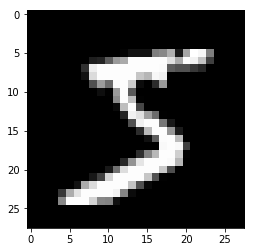

Ground Truth :  5


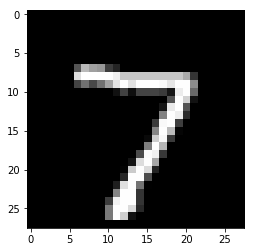

Ground Truth :  7


In [3]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Display the first image in training data
plt.imshow(train_images[0,:,:], cmap='gray')
plt.show()
print("Ground Truth : ", train_labels[0])

# Display the first image in testing data
plt.imshow(test_images[0,:,:], cmap='gray')
plt.show()
print("Ground Truth : ", test_labels[0])


# Process the data

* The images are grayscale and the pixel values range from 0 to 255.
* Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
* We convert the data to float and **scale** the values between 0 to 1.
* We also convert the labels from integer to **categorical ( one-hot ) encoding** since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the number. For example, using a one-hot encoding of 10 classes, the integer 5 will be encoded as 0000010000

In [4]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [5]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [6]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [7]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [8]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# Create the network

In [31]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
# model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# Configure the Network

In [32]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Network

In [33]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 17s - loss: 0.2912 - acc: 0.9076    
Epoch 2/10
60000/60000 [==============================] - 17s - loss: 0.0921 - acc: 0.9718    
Epoch 3/10
60000/60000 [==============================] - 18s - loss: 0.0573 - acc: 0.9821    
Epoch 4/10
60000/60000 [==============================] - 18s - loss: 0.0414 - acc: 0.9873    
Epoch 5/10
60000/60000 [==============================] - 17s - loss: 0.0302 - acc: 0.9906    
Epoch 6/10
60000/60000 [==============================] - 18s - loss: 0.0246 - acc: 0.9924    - ETA: 1s - loss: 0
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.0189 - acc: 0.9940    
Epoch 8/10
60000/60000 [==============================] - 17s - loss: 0.0199 - acc: 0.9942    
Epoch 9/10
60000/60000 [==============================] - 17s - loss: 0.0155 - acc: 0.9955    
Epoch 10/10
60000/60000 [==============================] - 18s - loss: 0.0120 - acc: 0.9962    


In [13]:
history.history['acc']

[0.91735,
 0.97150000000000003,
 0.98131666669845585,
 0.98658333333333337,
 0.99095,
 0.99303333333333332,
 0.99436666666666662,
 0.99568333333333336,
 0.99641666663487749,
 0.99706666666666666]

# Evaluate the trained network on training and test data

In [34]:
[train_loss, train_acc] = model.evaluate(train_data, train_labels_one_hot)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s     


In [35]:
print("Evaluation result on Train Data :  Loss = {}, accuracy = {}".format(train_loss, train_acc))
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Train Data :  Loss = 0.00549218264177, accuracy = 0.998283333333
Evaluation result on Test Data : Loss = 0.0915182666885, accuracy = 0.9854


# Add Dropout Regularization and train

In [36]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dropout(0.5))
# model_reg.add(Dense(512, activation='relu'))
# model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [37]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 17s - loss: 0.3772 - acc: 0.8866    
Epoch 2/10
60000/60000 [==============================] - 17s - loss: 0.1336 - acc: 0.9644    
Epoch 3/10
60000/60000 [==============================] - 17s - loss: 0.0900 - acc: 0.9752    
Epoch 4/10
60000/60000 [==============================] - 18s - loss: 0.0686 - acc: 0.9814    
Epoch 5/10
60000/60000 [==============================] - 17s - loss: 0.0554 - acc: 0.9851    
Epoch 6/10
60000/60000 [==============================] - 17s - loss: 0.0463 - acc: 0.9874    
Epoch 7/10
60000/60000 [==============================] - 18s - loss: 0.0417 - acc: 0.9892    
Epoch 8/10
60000/60000 [==============================] - 17s - loss: 0.0365 - acc: 0.9904    
Epoch 9/10
60000/60000 [==============================] - 18s - loss: 0.0323 - acc: 0.9922    
Epoch 10/10
60000/60000 [==============================] - 18s - loss: 0.0310 - acc: 0.9925    


In [39]:
[train_loss, train_acc] = model_reg.evaluate(train_data, train_labels_one_hot)
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)

 9984/10000 [============================>.] - ETA: 0s

In [40]:
print("Evaluation result on Train Data :  Loss = {}, accuracy = {}".format(train_loss, train_acc))
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Train Data :  Loss = 0.0142758363472, accuracy = 0.995933333333
Evaluation result on Test Data : Loss = 0.122970823377, accuracy = 0.9791


TypeError: fit() takes at least 3 arguments (1 given)

In [14]:
train_labels[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9,
       8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0,
       0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7,
       4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)